In [ ]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
GPU run command with Theano backend (with TensorFlow, the GPU is automatically used):
    THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatx=float32 python cifar10_cnn.py
It gets down to 0.65 test logloss in 25 epochs, and down to 0.55 after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 32
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 32, 32
# The CIFAR10 images are RGB.
img_channels = 3

In [2]:
# The data, shuffled and split between train and test sets:
(raw_x_train, raw_y_train), (raw_x_test, raw_y_test) = cifar10.load_data()
X_train = raw_x_train[:1000]
Y_train = raw_y_train[:1000]
X_test = raw_x_test[:200]
Y_test = raw_y_test[:200]
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (1000, 3, 32, 32)
1000 train samples
200 test samples


In [3]:
print(X_train.shape[0], 'train samples results')
print(Y_test.shape[0], 'test samples results')

1000 train samples results
200 test samples results


In [4]:
# Convert class vectors to binary class matrices.
#결과 값이 숫자 형태로 되어 있는데, 이를 one_hot 형태로 바꿔줌 (6 -> 0,0,0,0,0,1,0,0,0)
Y_train = keras.utils.np_utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.np_utils.to_categorical(Y_test, num_classes)

In [5]:
answer = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
model = Sequential()

model.add(Conv2D(32, 3, 3, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [8]:
X_train[1].shape

(3, 32, 32)

answer is "frog"
answer is "truck"
answer is "truck"


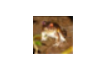

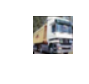

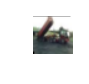

In [9]:
%matplotlib inline

from IPython.display import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np
import scipy

for idx in range(0,3):
    print('answer is "%s"' % ( answer[np.where(Y_train[idx]==1.0)[0][0]]))
    plt.figure()
    rotated_img = scipy.ndimage.rotate(X_train[idx].transpose(), -90)
    plt.subplots(figsize=(0.5, 0.5))
    plt.axis('off')
    plt.imshow(rotated_img)

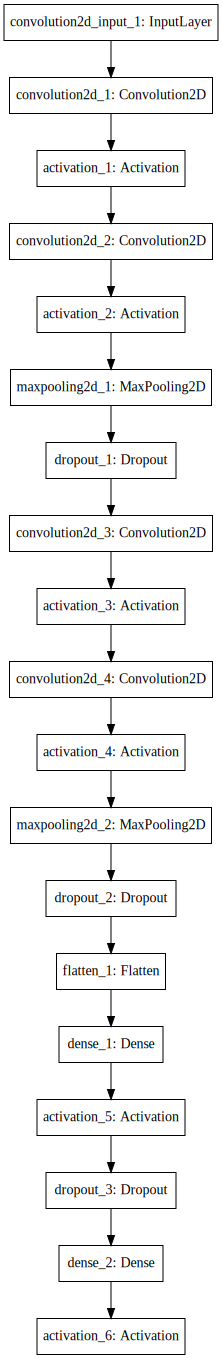

In [10]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [11]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=epochs,validation_data=(X_test, Y_test), shuffle=True, verbose=2)

Train on 1000 samples, validate on 200 samples
Epoch 1/10
43s - loss: 2.3062 - acc: 0.1240 - val_loss: 2.2776 - val_acc: 0.2450
Epoch 2/10
42s - loss: 2.2250 - acc: 0.2080 - val_loss: 2.1316 - val_acc: 0.1900
Epoch 3/10
42s - loss: 2.0028 - acc: 0.2880 - val_loss: 1.9010 - val_acc: 0.3200
Epoch 4/10
44s - loss: 1.9208 - acc: 0.3090 - val_loss: 1.8515 - val_acc: 0.3400
Epoch 5/10
44s - loss: 1.7961 - acc: 0.3410 - val_loss: 2.0779 - val_acc: 0.2850
Epoch 6/10
44s - loss: 1.7554 - acc: 0.3690 - val_loss: 2.1307 - val_acc: 0.2800
Epoch 7/10
44s - loss: 1.6979 - acc: 0.3760 - val_loss: 1.8231 - val_acc: 0.3350
Epoch 8/10
43s - loss: 1.6214 - acc: 0.4190 - val_loss: 1.8974 - val_acc: 0.3350
Epoch 9/10
43s - loss: 1.5189 - acc: 0.4430 - val_loss: 1.8051 - val_acc: 0.3450
Epoch 10/10
43s - loss: 1.4789 - acc: 0.4890 - val_loss: 1.8393 - val_acc: 0.3350


In [12]:
preds = model.predict_classes(X_test, verbose=0)

prediction: dog , real answer: cat
prediction: airplane , real answer: ship
prediction: ship , real answer: airplane
prediction: cat , real answer: frog


C:\Users\smilemango\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:16: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


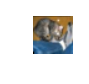

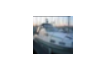

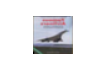

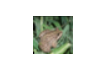

In [13]:
%matplotlib inline

from IPython.display import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

my_y = raw_y_test[:200]
comp_result = np.equal(preds,my_y.reshape(len(my_y)))
#comp_result = np.equal(preds,raw_y_test)
locs = np.where(comp_result==False)[0].tolist() # Find wrong answer positions


# 틀린 결과가 많으니 앞의 4개의 결과만 확인해 봅니다.
for idx in locs[0:4]:
    print('prediction:', answer[preds[idx]], ', real answer:', answer[raw_y_test[idx]])
    rotated_img = scipy.ndimage.rotate(X_test[idx].transpose(), -90)
    plt.subplots(figsize=(0.5, 0.5))
    plt.axis('off')
    plt.imshow(rotated_img)